# Domácí úkol č. 2 - 🕸 Síťová analýza PID

## 📚 Data
Jako dataset nám poslouží [otevřená data Pražské integrované dopravy](https://pid.cz/o-systemu/opendata/). Konkrétně budeme pracovat s daty [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs), která jsou původně ve formátu GTFS (General Transit Feed Specification). To je formát, který využívá široká škála softwarových aplikací a kvůli tomu jej při publikaci dat využívají také veřejné dopravní agentury včetně PID.

☝️**Pozor!** Pro řešení domácí úlohy vám poskytneme už připravený dataset $D$ ve formátu `csv`. Dataset $D$ jsme pro vás sestavili z dat, která pocházejí z [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs). Více informací o všech souborech a jejich atributech lze nalézt v [dokumentaci formátu GTFS](https://developers.google.com/transit/gtfs/reference).

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 4 body. Úkol řešíte jako **jednotlivci**.

**✨ Dataset**
* Načtěte si data ze souboru `d.csv`, což je již zmíněný dataset $D$, který obsahuje záznam pro každé dvě **po sobě jdoucí** zastávky nějakého spoje.
* Struktura je následující (pro zjednodušení neuvažujeme service start_date a end_date):
| stop_from | stop_from_name | stop_to | stop_to_name | depart_from | arrive_to | route_type | is_night | mon | tue | wed | thu | fri | sat | sun |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| U699Z3P | Stadion Strahov | U981Z1P | Koleje Strahov | 7:24:00 | 7:25:00 | 3 | 0 | 1 | 1 | 1 | 1 | 1 | 0 | 0 |

* Jedinečným identifikátorem zastávky je **název zastávky**. Pozor na stejné názvy zastávek pro různé dopravní prostředky - u takových zastávek uvažujte, že se jedná o jednu a tutéž stanici.


**🕸️ Základní síťová analýza** (celkem 12 bodů)

Úkolem je analyzovat síť zastávek PID. Zastávky tedy budou uzly sítě. Mezi dvěma zastávkami je orientovaná hrana, pokud jsou to dvě po sobě jdoucí zastávky nějakého spoje (existuje alespoň jeden záznam v datasetu $D$ s odpovídajícími `stop_from`, `stop_to`). Váha hrany je rovna počtu dopravních prostředků, které na dané trase za období jednoho týdne projedou.

Postupujte následovně:
* Začněte volbou libovolného balíčku pro analýzu a vizualizaci sítí (lze využít i zmíněný NetworkX),
* z datasetu $D$ vytvořte reprezentaci dat, která je vhodná pro vámi zvolený vizualizační balíček,
* vytvořte vizualizaci sítě (celkem za 4 body) - vizualizace musí být čitelná, proto můžete vizualizovat i podčást sítě (např. pro určitý dopravní prostředek, např. tramvaje (kromě vizualizace sítě lanovky nebo metra, tu neuznáváme) nebo nějaký podgraf - řešení ponecháme na vás),
* pomocí alespoň tří měr centrality analyzujte důležitost zastávek za období jednoho týdne (pondělí - neděle) a komentujte slovně, co tyto míry vzhledem ke konkrétním datům znamenají (každá míra za 2 body, celkem tedy za 6 bodů),
* vytvořte vizualizaci pro alespoň jednu míru centrality (celkem za 2 body).

**❓ Vlastní otázky** (3 body za každou otázku, celkem max. 9 bodů)

Vytvořte 3 otázky (můžete i více), založené na filtraci datasetu $D$ a odpovídejte na ně vhodnými vizualizacemi. Otázky pro inspiraci:
* Mění se důležité zastávky v závislosti na denním/nočním provozu?
* Je rozdíl ve vytíženosti zastávek během pracovního týdne/víkendu?
* ...

**🔥 Data navíc**

V souboru `stops.txt` je u každé zastávky uvedena **zeměpisná šířka a délka**. Tato data můžete využít pro rozšíření své analýzy a také vám mohou pomoci při layoutování grafu. ☝️ Pozor na stejné názvy zastávek s trochu jinou lokací pro různé dopravní prostředky. Je třeba navrhnout nějaké řešení (např. první, průměr, těžiště mnohoúhelníku apod., libovolně dle vašeho úsudku) a to zdůvodnit.

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 4 body za průběžné komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za vizualizaci sítě,
- 6 bodů za komentovanou analýzu alespoň 3 měr centrality,
- 2 body za vizualizaci jedné z měr centrality,
- 9 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 2 získat maximálně 25 bodů.

# Import knihoven


In [145]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
import netwulf as nw
import matplotlib.colors as mcolors
import matplotlib as mpl
import seaborn as sns
import operator
%matplotlib inline
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

from IPython.display import Image

# Informace o datasetu <u>d</u>
* 15 sloupců (příznaků)
* 1 642 433 řádek
* Všechny sloupce jsou typu *"object"* nebo *"int64"*
* Nejsou zde žádné chybějící hodnoty

In [146]:
df = pd.read_csv("d.csv")
print("Show 5 records\n-----------------")
display(df.head())
print("Basic info\n-----------------")
display(df.info())
print("Number of uniques records\n-----------------")
display(df.nunique())
print("Missing values\n-----------------")
display(df.isna().sum())

Show 5 records
-----------------


,stop_from,stop_from_name,stop_to,stop_to_name,depart_from,arrive_to,route_type,is_night,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,U2991Z301,Hněvice,T58005,Hněvice seř.n.,4:53:00,4:54:30,2,0,1,1,1,1,1,0,0
1,T58005,Hněvice seř.n.,U4610Z301,Záluží,4:54:30,4:56:00,2,0,1,1,1,1,1,0,0
2,U4610Z301,Záluží,U4609Z301,Dobříň,4:56:00,4:59:00,2,0,1,1,1,1,1,0,0
3,U4609Z301,Dobříň,U4608Z301,Roudnice nad Labem,4:59:00,5:03:00,2,0,1,1,1,1,1,0,0
4,U4608Z301,Roudnice nad Labem,U4609Z301,Dobříň,4:36:00,4:38:00,2,0,1,1,1,1,1,0,0


Basic info
-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642433 entries, 0 to 1642432
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   stop_from       1642433 non-null  object
 1   stop_from_name  1642433 non-null  object
 2   stop_to         1642433 non-null  object
 3   stop_to_name    1642433 non-null  object
 4   depart_from     1642433 non-null  object
 5   arrive_to       1642433 non-null  object
 6   route_type      1642433 non-null  int64 
 7   is_night        1642433 non-null  int64 
 8   monday          1642433 non-null  int64 
 9   tuesday         1642433 non-null  int64 
 10  wednesday       1642433 non-null  int64 
 11  thursday        1642433 non-null  int64 
 12  friday          1642433 non-null  int64 
 13  saturday        1642433 non-null  int64 
 14  sunday          1642433 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 188.0+ MB


None

Number of uniques records
-----------------


stop_from         15178
stop_from_name     7389
stop_to           15154
stop_to_name       7387
depart_from       14021
arrive_to         13858
route_type            6
is_night              2
monday                2
tuesday               2
wednesday             2
thursday              2
friday                2
saturday              2
sunday                2
dtype: int64

Missing values
-----------------


stop_from         0
stop_from_name    0
stop_to           0
stop_to_name      0
depart_from       0
arrive_to         0
route_type        0
is_night          0
monday            0
tuesday           0
wednesday         0
thursday          0
friday            0
saturday          0
sunday            0
dtype: int64

### Načtení zeměpisné šířky a délky **"stops.txt"**

In [147]:
location = pd.read_csv("stops.txt")
location = location.drop(['stop_id', 'zone_id', 'stop_url', 'location_type', 'parent_station', 'wheelchair_boarding', 'level_id', 'platform_code', 'asw_node_id', 'asw_stop_id'], axis = 1)
location = location.dropna()
location.rename(columns = {'stop_name':'stop_from_name'}, inplace = True)
location = location.groupby(['stop_from_name']).first()
location = location.reset_index()
display(location)

,stop_from_name,stop_lat,stop_lon
0,"AHr Km 11,485",50.146550,14.731470
1,Albertov,50.067245,14.421646
2,Ametystová,49.988201,14.362216
3,Amforová,50.041851,14.327283
4,Anděl,50.069950,14.403768
...,...,...,...
7542,"Žďár,Otěvěky",50.059269,13.474494
7543,"Žďár,Příhrazská",50.547050,15.072974
7544,"Žďár,u kostela",50.543049,15.084052
7545,"Žďár,Žehrov",50.530098,15.100468


### Prohození šířky a délky
* Bez prohození nebyla vizualizace přesná (např. mapa metra neodpovídala reálné mapě metra).

In [148]:
get_location = location.set_index('stop_from_name').T.to_dict('list')
print("------------before------------")
for x in list(get_location)[0:5]:
    print (x, get_location[x])
for i, r in get_location.items():
    tmp = r[0]
    r[0] = r[1]
    r[1] = tmp
print("------------after------------")
for x in list(get_location)[0:5]:
    print (x, get_location[x])

------------before------------
AHr Km 11,485 [50.14655, 14.73147]
Albertov [50.067245, 14.421646]
Ametystová [49.988201, 14.362216]
Amforová [50.041851, 14.327283]
Anděl [50.06995, 14.403768]
------------after------------
AHr Km 11,485 [14.73147, 50.14655]
Albertov [14.421646, 50.067245]
Ametystová [14.362216, 49.988201]
Amforová [14.327283, 50.041851]
Anděl [14.403768, 50.06995]


### Upravení **"depart_from"** a **"arrive_to"**
* Obsahují totiž časové údaje delší než 24 hodin
* Pomocí modulo 24 opravím

In [149]:
def split_time(arr):
    tmp = arr.split(":")
    tmp[0] = str(int(tmp[0]) % 24)
    arr = ":".join(tmp)
    return arr

In [150]:
print("------------before------------")
display(df.iloc[(1484120)])
df['depart_from'] = df['depart_from'].apply(split_time)
df['arrive_to'] = df['arrive_to'].apply(split_time)
print("------------after------------")
display(df.iloc[(1484120)])

------------before------------


stop_from                U387Z4P
stop_from_name    Pobřežní cesta
stop_to                  U614Z3P
stop_to_name         Přístaviště
depart_from             24:10:00
arrive_to               24:11:00
route_type                     3
is_night                       1
monday                         1
tuesday                        1
wednesday                      1
thursday                       1
friday                         1
saturday                       0
sunday                         0
Name: 1484120, dtype: object

------------after------------


stop_from                U387Z4P
stop_from_name    Pobřežní cesta
stop_to                  U614Z3P
stop_to_name         Přístaviště
depart_from              0:10:00
arrive_to                0:11:00
route_type                     3
is_night                       1
monday                         1
tuesday                        1
wednesday                      1
thursday                       1
friday                         1
saturday                       0
sunday                         0
Name: 1484120, dtype: object

### Typy dopravních prostředků

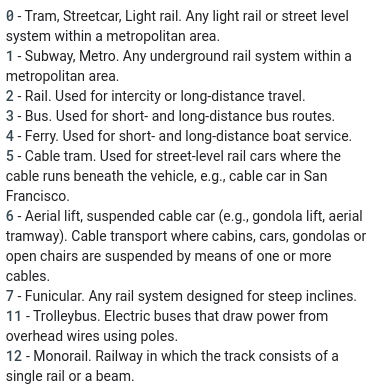

In [151]:
display(Image(filename='route_type.png'))

### Přidání pomocných sloupců
* **"days"** : Celkový počet dní *(Po - Ne)*, kdy daný spoj jezdí
* **"type"** : *1* pokud se jedná o daný dopravní prostředek *(aktuálně tramvaj = 0)*, jinak *0*
* **"week"** : *True* pokud spoj jezdí pouze přes pracovní dny *(Po - Pá)*, jinak *False*
* **"weekend"** : *True* pokud spoj jezdí pouze přes víkend *(So - Ne)*, jinak *False*

In [152]:
df["days"] = df['monday'] + df['tuesday'] + df['wednesday'] + df['thursday'] + df['friday'] + df['saturday']+ df['sunday']
df['days'] = df['days'].astype(int)
print("Days || Connections")
display(df['days'].value_counts())

Days || Connections


5    1049704
2     303654
1     177374
7     102909
6       7013
0       1253
4        340
3        186
Name: days, dtype: int64

In [153]:
# type := 1 if TRUE, 0 otherwise
df["type"] = (df['route_type'] == 0).astype(int)
display(df['type'].value_counts())

0    1067418
1     575015
Name: type, dtype: int64

In [154]:
df['week'] = df.apply(lambda x: x['monday'] == x['tuesday'] == x['wednesday'] == x['thursday'] == x['friday'] == 1, axis=1)
df['weekend'] = df.apply(lambda x: x['saturday'] == x['sunday'] == 1, axis=1)
display(df.head(10))

,stop_from,stop_from_name,stop_to,stop_to_name,depart_from,arrive_to,route_type,is_night,monday,tuesday,wednesday,thursday,friday,saturday,sunday,days,type,week,weekend
0,U2991Z301,Hněvice,T58005,Hněvice seř.n.,4:53:00,4:54:30,2,0,1,1,1,1,1,0,0,5,0,True,False
1,T58005,Hněvice seř.n.,U4610Z301,Záluží,4:54:30,4:56:00,2,0,1,1,1,1,1,0,0,5,0,True,False
2,U4610Z301,Záluží,U4609Z301,Dobříň,4:56:00,4:59:00,2,0,1,1,1,1,1,0,0,5,0,True,False
3,U4609Z301,Dobříň,U4608Z301,Roudnice nad Labem,4:59:00,5:03:00,2,0,1,1,1,1,1,0,0,5,0,True,False
4,U4608Z301,Roudnice nad Labem,U4609Z301,Dobříň,4:36:00,4:38:00,2,0,1,1,1,1,1,0,0,5,0,True,False
5,U4609Z301,Dobříň,U4610Z301,Záluží,4:38:00,4:39:00,2,0,1,1,1,1,1,0,0,5,0,True,False
6,U4610Z301,Záluží,T58005,Hněvice seř.n.,4:39:00,4:40:30,2,0,1,1,1,1,1,0,0,5,0,True,False
7,T58005,Hněvice seř.n.,U2991Z301,Hněvice,4:40:30,4:41:30,2,0,1,1,1,1,1,0,0,5,0,True,False
8,U2991Z301,Hněvice,T58005,Hněvice seř.n.,5:53:00,5:54:30,2,0,1,1,1,1,1,1,1,7,0,True,True
9,T58005,Hněvice seř.n.,U4610Z301,Záluží,5:54:30,5:56:00,2,0,1,1,1,1,1,1,1,7,0,True,True


### Vytvoření podmnožiny: Tramvaj, která jezdí pouze o víkendu a přes den

In [155]:
data = df.loc[(df['type'] == 1) & (df['is_night'] == 0) & (df['week'] == False) & (df['weekend'] == True)]
display(data.head())

,stop_from,stop_from_name,stop_to,stop_to_name,depart_from,arrive_to,route_type,is_night,monday,tuesday,wednesday,thursday,friday,saturday,sunday,days,type,week,weekend
35604,U865Z2P,Vozovna Motol,U394Z2P,Motol,5:07:00,5:08:00,0,0,0,0,0,0,0,1,1,2,1,False,True
35605,U394Z2P,Motol,U395Z2P,Krematorium Motol,5:08:00,5:09:00,0,0,0,0,0,0,0,1,1,2,1,False,True
35606,U395Z2P,Krematorium Motol,U113Z2P,Hlušičkova,5:09:00,5:10:00,0,0,0,0,0,0,0,1,1,2,1,False,True
35607,U113Z2P,Hlušičkova,U236Z2P,Slánská,5:10:00,5:12:00,0,0,0,0,0,0,0,1,1,2,1,False,True
35608,U236Z2P,Slánská,U47Z2P,Blatiny,5:12:00,5:13:00,0,0,0,0,0,0,0,1,1,2,1,False,True


### Sestavení grafu
* Spočítaní vah hran
* Přidání hran do grafu (vrcholy tvoří jména zastávek)
* Vizualizace grafu

In [156]:
# Count weight for each edge (1 connection = +1 weight)
def edges(df) -> dict:
    edge_list = {}
    for id, rows in df.iterrows():
        days = 0
        if (rows['stop_from_name'], rows['stop_to_name']) in edge_list:
            edge_list[(rows['stop_from_name'], rows['stop_to_name'])] += 1
        else:
            edge_list[(rows['stop_from_name'], rows['stop_to_name'])] = 1
    return edge_list

In [157]:
get_edges = edges(data)
for x in list(get_edges)[0:5]:
    print (x, get_edges[x])

('Vozovna Motol', 'Motol') 155
('Motol', 'Krematorium Motol') 155
('Krematorium Motol', 'Hlušičkova') 155
('Hlušičkova', 'Slánská') 155
('Slánská', 'Blatiny') 155


In [158]:
graph = nx.DiGraph()
# add edges to graph
for e, w in get_edges.items():
    graph.add_edge(e[0], e[1])
    graph[e[0]][e[1]]['weight'] = w

In [159]:
labels = {}
# wrong tram stops with degree == 2
to_del = ['Divadlo pod Palmovkou', 'Mezi Hřbitovy', 'Špejchar', 'Třebenická', 'Korunovační', 'Karlovy lázně']
degrees = [(node, val) for (node, val) in graph.degree()]
for i in degrees:
    if (i[1] == 2 or i[1] == 1) and i[0] not in to_del:
        labels[i[0]] = i[0]

In [160]:
def plot_graph(graph):
    # node colors based on "degree_centrality"
    cmap = plt.cm.plasma
    fig, axC = plt.subplots(figsize=(25, 20))
    axC = nx.draw(graph, pos=get_location, node_size=110, cmap=cmap, arrowstyle="-", node_color=list(nx.degree_centrality(graph).values()))
    #axC = nx.draw_networkx_labels(graph, get_location, labels,font_size=15, font_color='green', horizontalalignment="center", verticalalignment="center_baseline")
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
    sm._A = []
    plt.colorbar(sm)

### Vizualizace tramvajových spojů, které jezdí pouze o víkendu a přes den
* Čím žlutější barva, tím více vytížená zastávka (spousta různých spojů ji využívá).

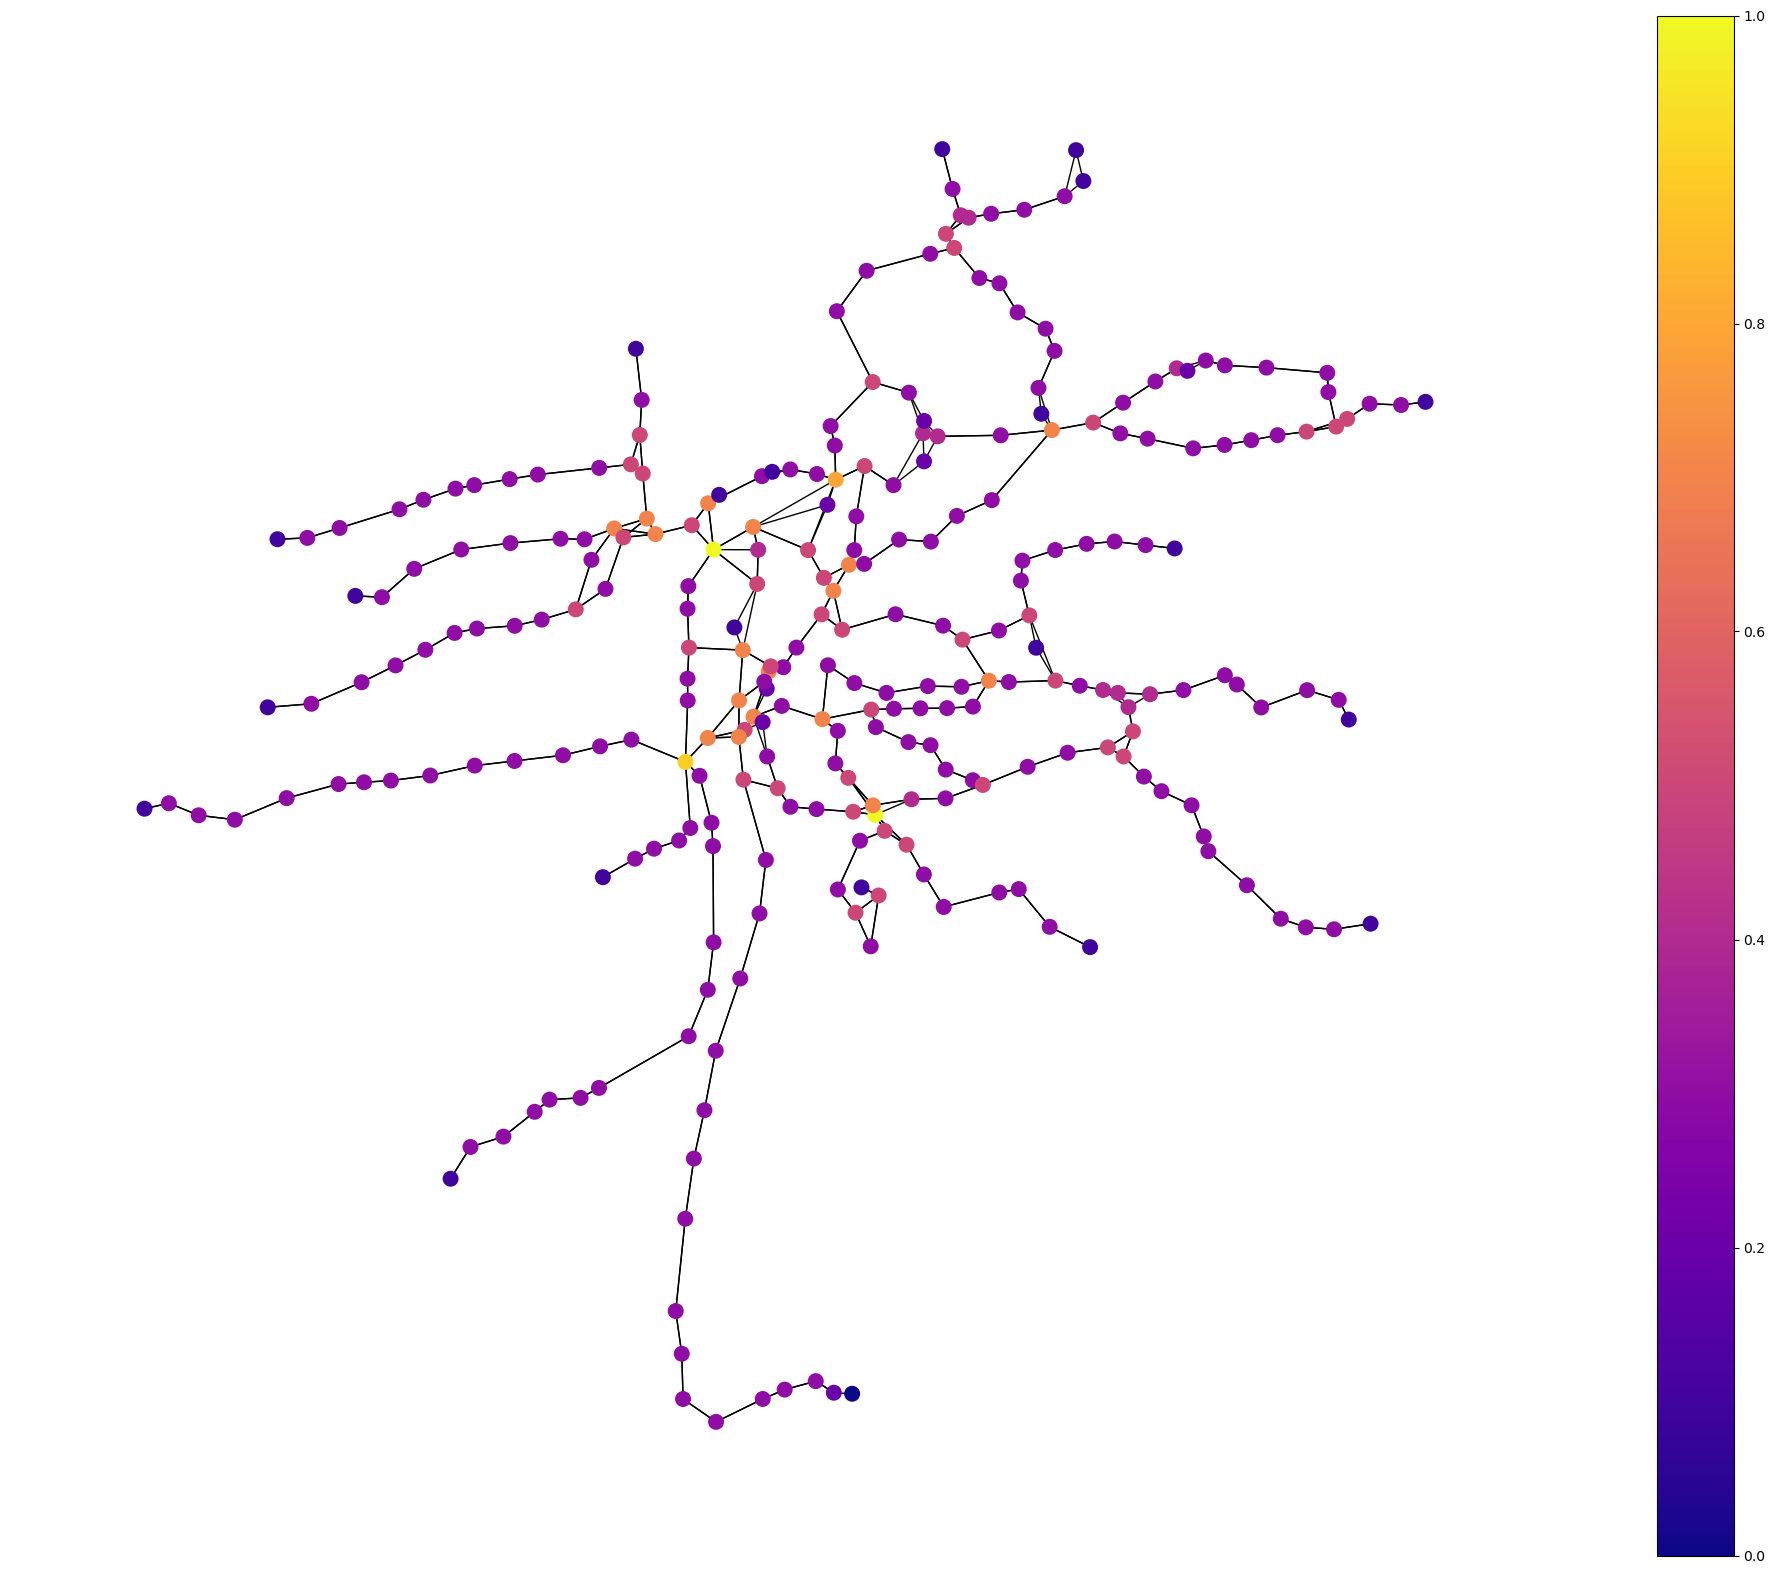

In [161]:
plot_graph(graph)

### Centrality
* Využiji část databáze - pouze spoje co jezdí po celý týden (od Po do Ne)
* Pro zájem: *Pro výpočet centralit celé databáze lze zakomentovat **A** a odkomentovat **B***
* Jednotlivé centrality:
    * Obecný popis centralit = *BI-VIZ: 06 Grafy a sociální sítě*
    * Konkrétní popis centralit
    * Vizualizace centralit
        * Tabulka
        * Graf *(kromě Eigenvector centrality)*

In [162]:
# A - from Mo to Su
# only full week connections
cent = df.loc[(df['week'] == True) & (df['weekend'] == True)]

# B - full database
# get full database for centrality
#cent = df

display(cent.head())

,stop_from,stop_from_name,stop_to,stop_to_name,depart_from,arrive_to,route_type,is_night,monday,tuesday,wednesday,thursday,friday,saturday,sunday,days,type,week,weekend
8,U2991Z301,Hněvice,T58005,Hněvice seř.n.,5:53:00,5:54:30,2,0,1,1,1,1,1,1,1,7,0,True,True
9,T58005,Hněvice seř.n.,U4610Z301,Záluží,5:54:30,5:56:00,2,0,1,1,1,1,1,1,1,7,0,True,True
10,U4610Z301,Záluží,U4609Z301,Dobříň,5:56:00,5:59:00,2,0,1,1,1,1,1,1,1,7,0,True,True
11,U4609Z301,Dobříň,U4608Z301,Roudnice nad Labem,5:59:00,6:03:00,2,0,1,1,1,1,1,1,1,7,0,True,True
28,U4608Z301,Roudnice nad Labem,U4609Z301,Dobříň,5:54:00,5:56:30,2,0,1,1,1,1,1,1,1,7,0,True,True


In [163]:
# create edges
get_edges = edges(cent)
for x in list(get_edges)[0:5]:
    print (x, get_edges[x])

('Hněvice', 'Hněvice seř.n.') 15
('Hněvice seř.n.', 'Záluží') 15
('Záluží', 'Dobříň') 15
('Dobříň', 'Roudnice nad Labem') 15
('Roudnice nad Labem', 'Dobříň') 17


In [164]:
G = nx.DiGraph()
# add edges to graph
for e, w in get_edges.items():
    G.add_edge(e[0], e[1])
    G[e[0]][e[1]]['weight'] = w

In [165]:
# func for centrality visualization
def plot_cent(a, tt):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax = sns.barplot(a['node'], a['centrality'])
    plt.title(tt)

#### Closeness centrality
* Důležitost aktéra je založena na jeho průměrné vzdálenosti (nejkratší cesty) od všech dosažitelných vrcholů v síti.
* Čím blíže je aktér k ostatním aktérům, tím je důležitější.
* Z výsledku níže vidíme, že ze zastávek **'Hlavní nádraží'**, **'Muzeum'**, **'Florenc'**, **'Můstek'** a **'Náměstí Republiky'** se "nejrychleji" dostaneme do všech ostatních dosažitelných zastávek (vrcholů).

In [166]:
# https://stackoverflow.com/questions/58388820/finding-highest-centrality-measure-in-networkx-python
def cc_summary(G):
    cc = nx.closeness_centrality(G)
    df = pd.DataFrame.from_dict({
        'node': list(cc.keys()),
        'centrality': list(cc.values())
    })
    return df.sort_values('centrality', ascending=False)

Most used


,node,centrality
1303,Hlavní nádraží,0.050366
402,Muzeum,0.050244
1041,Florenc,0.050031
3295,Můstek,0.049837
1301,Náměstí Republiky,0.049485


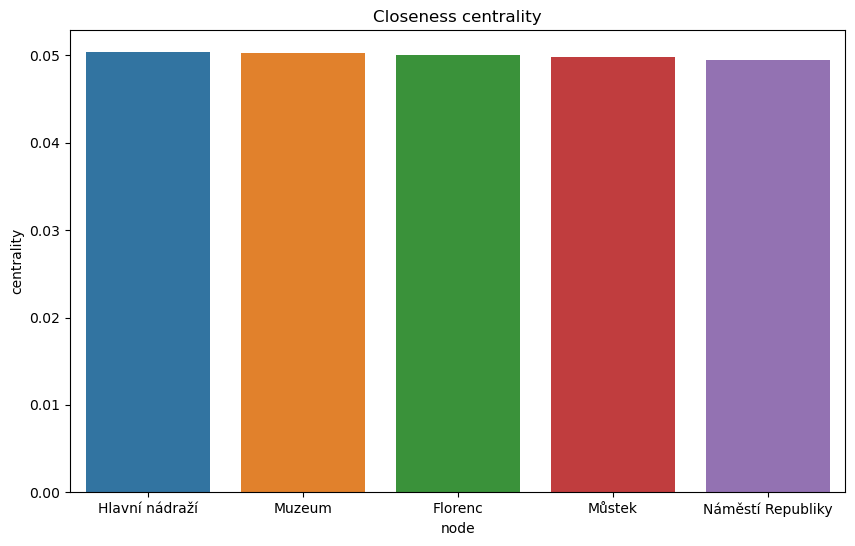

In [167]:
closeness_centrality = cc_summary(G)

print("Most used")
display(closeness_centrality.head())
plot_cent(closeness_centrality.head(), "Closeness centrality")

#### Degree centrality
* Určuje významnost vrcholu podle jeho stupně *(stupeň vrcholu označuje počet hran, které do daného vrcholu zasahují)*.
* Z výsledku níže vidíme, že nejvíce spojů jede přes zastávky **'Kobylisy'**, **'Lihovar'**, **'Anděl'**, **'Prosek'** a **'Vysočanská'**.

In [168]:
def dc_summary(G):
    dc = nx.degree_centrality(G)
    df = pd.DataFrame.from_dict({
        'node': list(dc.keys()),
        'centrality': list(dc.values())
    })
    return df.sort_values('centrality', ascending=False)

Most used


,node,centrality
90,Kobylisy,0.006675
135,Lihovar,0.006371
235,Anděl,0.005765
1171,Prosek,0.005461
1157,Vysočanská,0.005158


Least used


,node,centrality
990,Městec Králové,0.000303
2865,"Uhlířská Lhota,Rasochy",0.000303
2576,"Slaný,Arbesova",0.000303
3016,"Kladno,pekárna",0.000303
2207,"Roztoky,Přemyslovská",0.000303


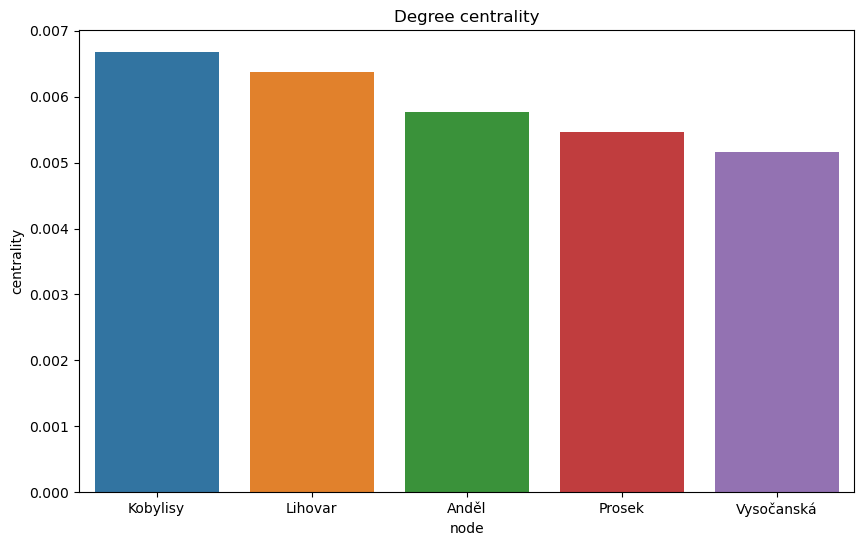

In [169]:
deg_centrality = dc_summary(G)

print("Most used")
display(deg_centrality.head())
print("Least used")
display(deg_centrality.tail())
plot_cent(deg_centrality.head(), "Degree centrality")

#### Betweenness centrality
* Představuje frekvenci, s jakou se vrchol objevuje na nejkratší cestě mezi jinými dvěma vrcholy.
* Z výsledku níže vidíme, že nejfrekventovanější zastávky jsou **'Hlavní nádraží'**, **'Lihovar'**, **'Muzeum'**, **'Zličín'** a a **'Smíchovské nádraží'**.

In [170]:
def bc_summary(G):
    bc = nx.betweenness_centrality(G)
    df = pd.DataFrame.from_dict({
        'node': list(bc.keys()),
        'centrality': list(bc.values())
    })
    return df.sort_values('centrality', ascending=False)

Most used


,node,centrality
1303,Hlavní nádraží,0.194070
135,Lihovar,0.182140
402,Muzeum,0.169429
5,Zličín,0.161667
134,Smíchovské nádraží,0.150285


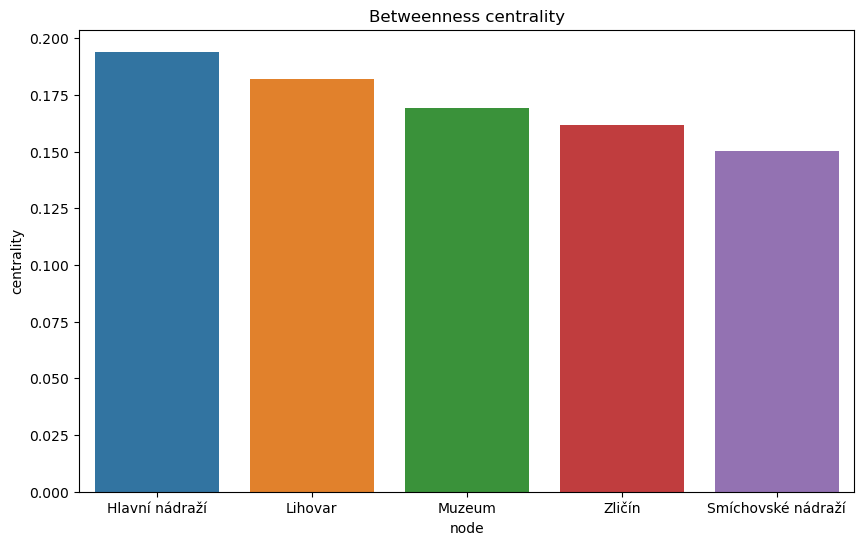

In [171]:
betweenness_centrality = bc_summary(G)

print("Most used")
display(betweenness_centrality.head())
plot_cent(betweenness_centrality.head(), "Betweenness centrality")

#### Eigenvector centrality
* Udává, jak blízko je vrchol k ostatním vrcholům s vysokým stupněm těsnosti.
* Počítá centralitu vrcholu na základě centralit jeho sousedů - každý uzel může mít jinou váhu (míru centrality).
* Skóre vrcholu je tedy poměrné vzhledem k součtu skóre jeho sousedů.
* Vliv vrcholu roste s tím, jak vlivné vrcholy jej obklopují.
* Z výsledku níže vidíme, že nejvlivnější zastávky jsou **'Anděl'**, **'Karlovo náměstí'**, **'Smíchovské nádraží'**, **'Na Knížecí'** a a **'Zborovská'**.

In [172]:
# https://stackoverflow.com/questions/43208737/using-networkx-to-calculate-eigenvector-centrality
# thats why I use eigenvector_centrality_numpy
def ec_summary(G):
    ec = nx.eigenvector_centrality_numpy(G)
    df = pd.DataFrame.from_dict({
        'node': list(ec.keys()),
        'centrality': list(ec.values())
    })
    return df.sort_values('centrality', ascending=False)

In [173]:
eigenvector_centrality = ec_summary(G)

print("Most used")
display(eigenvector_centrality.head())

Most used


,node,centrality
235,Anděl,0.369745
231,Karlovo náměstí,0.280641
134,Smíchovské nádraží,0.230131
456,Na Knížecí,0.226025
234,Zborovská,0.212019


# Otázky

### Jaký je procentuální rozdíl počtu spojů co jezdí přes týden oproti spojům co jezdí přes víkend.
* Z grafu níže lze vidět, že spoje co jezdí přes pracovní týden tvoří 68,6% všech spojů a víkendové spoje tvoří zbylých 31,4%.

In [174]:
def new_pie(sum_all, labels):
    plt.pie(sum_all, labels=labels, autopct='%1.1f%%')
    plt.title("Diffrence between weekend and week trafic")

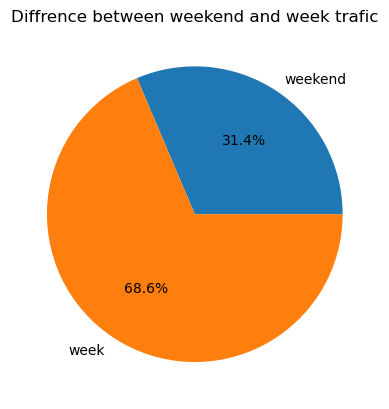

In [175]:
#df["days"] = df['monday'] + df['tuesday'] + df['wednesday'] + df['thursday'] + df['friday'] + df['saturday']+ df['sunday']
weekend = df.loc[(df['monday'] == 0) & (df['tuesday'] == 0) & (df['wednesday'] == 0) & (df['thursday'] == 0) & (df['friday'] == 0) & ((df['saturday'] == 1) | (df['sunday'] == 1))]
week = df.loc[((df['monday'] == 1) | (df['tuesday'] == 1) | (df['wednesday'] == 1) | (df['thursday'] == 1) | (df['friday'] == 1)) & (df['saturday'] == 0) & (df['sunday'] == 0)]
sum_weekend = (weekend['days'].value_counts().sum())
sum_week = (week['days'].value_counts().sum())
sum_all = [sum_weekend, sum_week]
labels = ['weekend', 'week']
new_pie(sum_all, labels)

### Jaké jsou nejpoužívanější dopravní prostředky (mají nejvíce různých spojů).
* Z tabuky i grafu níže lze vidět, že více než polovina všech spojů je tvořena pouze busem. Poté představuje značnou část zbylých spojů tramvaj. Zbylá část jsou ostatní dopravní prostředky.

In [176]:
def get_pie(data, bins):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.pie(data, labels=bins, autopct='%1.1f%%')
    plt.title("Types of transport") 

,Type,Frequency,Relative frequency
3,Bus,954268,0.581009
0,Tram,575015,0.350100
1,Metro,56464,0.034378
2,Rail,55672,0.033896
4,Ferry,698,0.000425
7,Funicular,316,0.000192


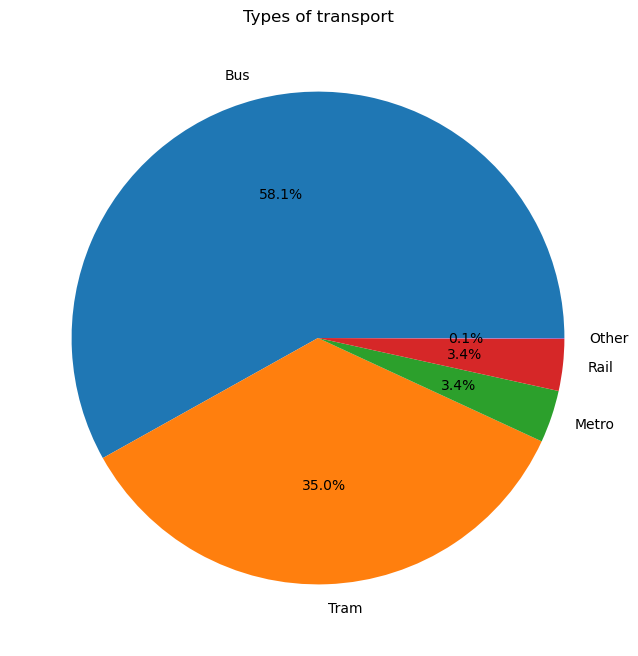

In [177]:
traffic_types = df['route_type']
# Types of transport we have in database (from picture above)
x = ['Bus', 'Tram', 'Metro', 'Rail', 'Ferry', 'Funicular']
#display(traffic_types.value_counts())

# 'Ferry', 'Funicular' are little used so I changed them to 'Other'
x1 = ['Bus', 'Tram', 'Metro', 'Rail', 'Other']
stats = pd.DataFrame(data={
    'Type': x,
    'Frequency': traffic_types.value_counts(),
    'Relative frequency': traffic_types.value_counts(normalize=True) })
display(stats)

#  Frequency count for plot
fr = []
for i in traffic_types.value_counts():
    fr.append(i)
fr[4] = fr[4] + fr[5]
fr = fr[:-1]

get_pie(fr, x1)

### Jaké jsou nevytíženější spoje přes den a v noci.
* Z tabulky níže vidíme, že nejvytíženější denní spoj je mezi zastávkami **Lihovar** a **Smíchovské nádraží**.
* Z druhé tabulky vidíme, že noční nejvytíženější spoje jsou mezi zastávkami **Karlovo náměstí** a **Novoměstská radnice**, **Novoměstská radnice** a **Lazarská**, **Lazarská** a **Karlovo náměstí**.

In [178]:
day = df.loc[(df['is_night'] == 0)]
night = df.loc[(df['is_night'] == 1)]
get_edges_day = edges(day)
get_edges_night = edges(night)

In [180]:
get_edges_day = dict(sorted(get_edges_day.items(), key=operator.itemgetter(1), reverse=True)[:5])
names = []
count = []
for i in get_edges_day.items():
    names.append(i[0])
    count.append(i[1])

dday = pd.DataFrame(data={
 'From_name - To_name': names,
 'Count': count
})

top5 = dday.sort_values('Count', ascending=False).head()
print("Most used connections during day")
display(top5)

get_edges_night = dict(sorted(get_edges_night.items(), key=operator.itemgetter(1), reverse=True)[:5])
names = []
count = []
for i  in get_edges_night.items():
    names.append(i[0])
    count.append(i[1])

nnight = pd.DataFrame(data={
 'From_name - To_name': names,
 'Count': count
})

top5_n = nnight.sort_values('Count', ascending=False).head()
print("Most used connections during night")
display(top5_n)

Most used connections during day


,From_name - To_name,Count
0,"(Lihovar, Smíchovské nádraží)",3065
1,"(Smíchovské nádraží, Lihovar)",2946
2,"(Národní divadlo, Národní třída)",2380
3,"(Karlovo náměstí, Novoměstská radnice)",2321
4,"(Královský letohrádek, Pražský hrad)",2265


Most used connections during night


,From_name - To_name,Count
0,"(Karlovo náměstí, Novoměstská radnice)",170
1,"(Novoměstská radnice, Lazarská)",170
2,"(Lazarská, Karlovo náměstí)",170
3,"(Štěpánská, I. P. Pavlova)",130
4,"(Lazarská, Vodičkova)",127
